# Split Plots

In [11]:
# Libraries
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
from scipy.stats import sem, t
import os


In [709]:
# Settings for plotlib
font = {'size'   : 20}
plt.rc('font', **font)  # pass in the font dict as kwargs

In [ ]:
# Funzione per caricare i dati da un percorso
def load_trials(base_path, filename="pg_results.json"):
    trial_performances = []
    for i in range(8):  # Supponiamo un massimo di 50 trial (modificabile)
        trial_path = os.path.join(base_path, f"trial_{i}")
        if os.path.isdir(trial_path):
            try:
                file_path = os.path.join(trial_path, filename)
                with open(file_path, 'r') as file:
                    data = json.load(file)
                    trial_performances.append(data["performance"])
            except (FileNotFoundError, json.JSONDecodeError) as e:
                print(f"Errore nel leggere {file_path}: {e}")
    return np.array(trial_performances)  # Converte in array per calcoli successivi

# Split vs Baselines RESULTS

In [756]:
# Path to results
paths = [
    # path/to/results
]


labels = ["GAPS", "PG-RBF", "PG-MLP"]

# Lista per memorizzare le performance per ogni set
all_performances = []
for path in paths:
    performances = load_trials(path, "pg_results.json")
    if performances.size > 0:
        all_performances.append(performances)


75.56861173286562
75.07801125868926
76.05921220704198
173.01255618394705
154.7620710199033
191.2630413479908
121.71502308654676
101.34139154172705
142.0886546313665


<Figure size 640x480 with 0 Axes>

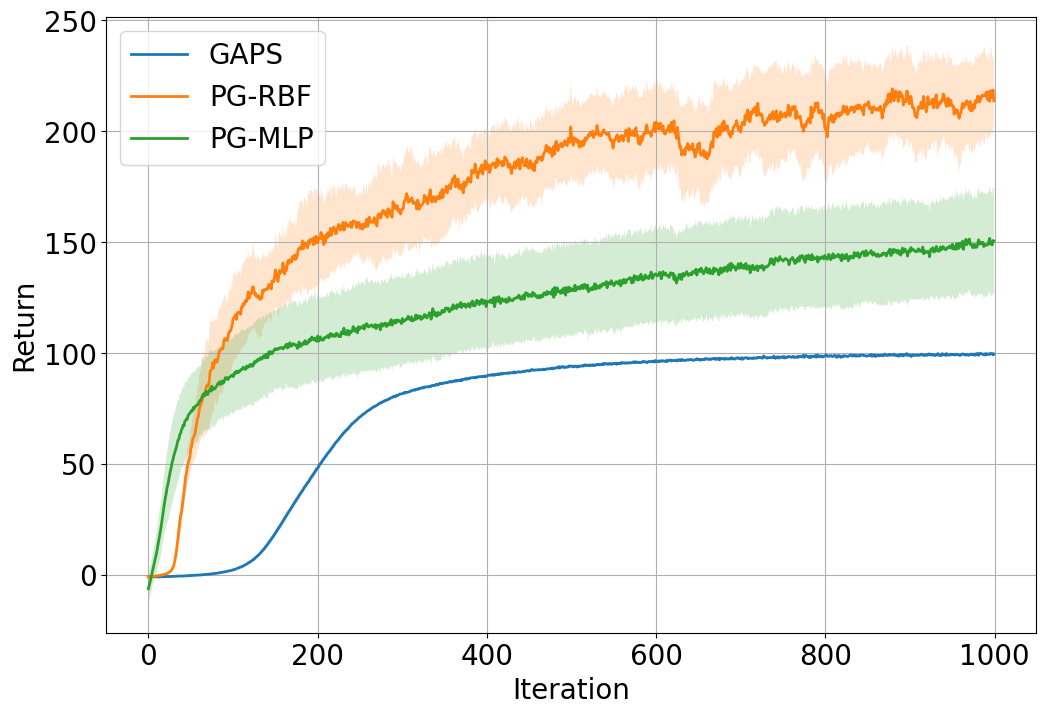

In [757]:
# Plot dei grafici
plt.clf()
plt.figure(figsize=(12, 8))

for i, performances in enumerate(all_performances):
    if performances.size > 0:
        # Calcola la media e gli intervalli di confidenza
        mean_performance = np.mean(performances, axis=0)
        std_performance = np.std(performances, axis=0)

        # Plot della curva media
        plt.plot(mean_performance, linewidth=2, label=labels[i])

        # Plot dell'intervallo di confidenza
        lower = mean_performance-(std_performance*1.96)/np.sqrt(performances.shape[0])
        higher = mean_performance+(std_performance*1.96)/np.sqrt(performances.shape[0])

        plt.fill_between(
            range(len(mean_performance)),
            lower,
            higher,
            alpha=0.2
        )

        print(np.mean(mean_performance))
        print(np.mean(lower))
        print(np.mean(higher))


# Etichette
plt.xlabel("Iteration")
plt.ylabel("Return")
plt.legend(loc="best")
plt.grid()

# Salva e mostra il grafico
# plt.savefig("title.pdf", format='pdf')
plt.show()

# Split RESULTS

<Figure size 640x480 with 0 Axes>

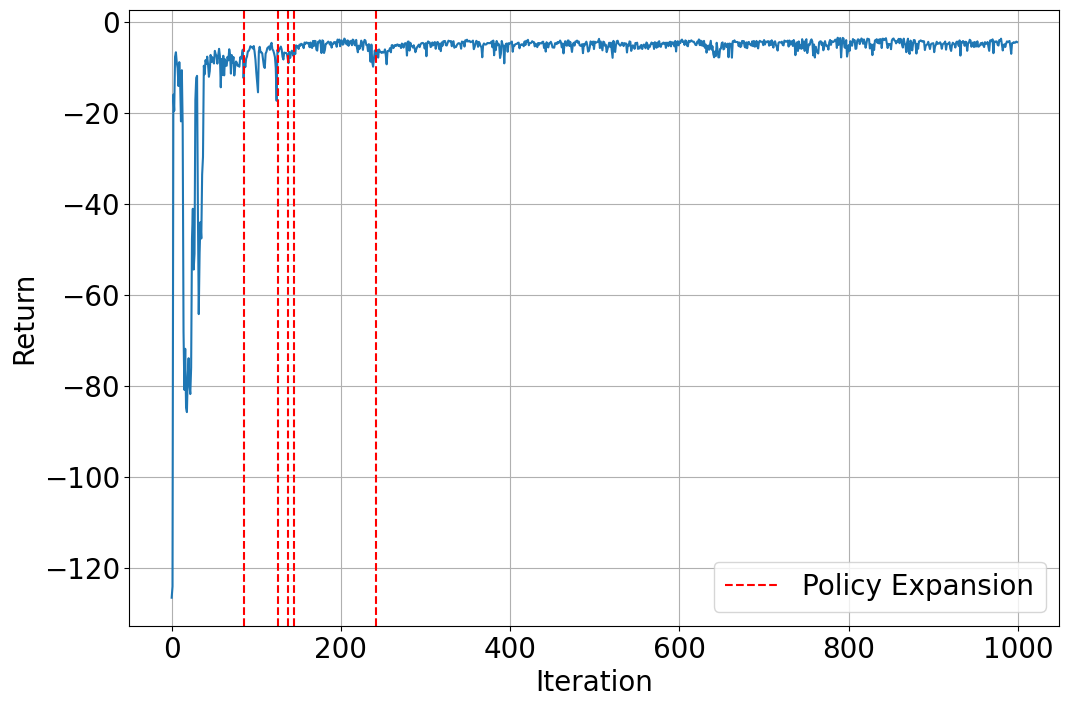

In [761]:
# Path to results_debug
path = [
    # path/to/results
]

data = []
for p in path:
    name = p + "/pg_results.json"
    with open(name) as file:
        data.append(json.load(file))

plt.clf()
plt.figure(figsize=(12, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"])
    
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)

plt.xlabel("Iteration")
plt.ylabel("Return")
plt.legend(loc="best")
plt.grid()
# plt.savefig("title.pdf", format='pdf')
plt.show()